# Project Name - Exploratory Data Analysis for FedEx Logistics

Project Type - EDA

Contribution - Individual

# **Project Summary**


The topic of this project is the fact that an intensive Exploratory Data Analysis (EDA) is to be presented on the consideration of the FedEx SCMS Delivery History Dataset. The major objective is to derive pertinent information out of the logistics information so that one can manage the operations more efficiently, develop an efficient freight management, and streamline the supply chain. The database (with more than 10000 values corresponded to 33 columns) records the history of shipments such as freight cost, mode of transport, country of origin and destination, and whether the item is delivered or not.


## Dataset Overview
The dataset contains several columns that has include shipment ID, project codes, ways of shipping (Air, Truck, etc.), description of items, quantity, price per unit, planned and actual delivery time, and team of managing. The first exploration of the data showed a lack of values, variances in date formats, and the existence of outliers in various numerical variables, including freight cost and lead time.

## Libraries used
* Numpy has been used for creating nan values and basically in detection of outliers.
* Pandas has been used for data loading, manipulation and data wrangling.
* Seaborn and Maplotlib has been used for visualisation of data with respect to various graphs and chart. These libraries supports static visualisation.
* Plotly has been used get interactive visualisation. A number of graphs include KPIs are plotted with the help of Plotly.
* To ignore warning message, warning has been imported.

## Data Preparation
Data preparation has been done effectively which is involved:
* Handling missing values with for categorical and numerical columns. Categorical columns has been filled with mode values while the numerical columns has been filled with median values. the reason for not dropping those rows that is not recommended due to loss of data.
* Various columns has been converted into numerical such as weight and freight cost. Moreover, the date columns has been also converted into datetime column. All these columns was in Object type earlier.
* IQR methods has been used to detect the outliers. The outliers has been converted into nan and then these values has been filled with median.
* Irrelevant columns has been dropped
* To support deeper analysis and trends with respect to time, year, Month deliveries and Lead time has been created

## Important Insights & Graphs
The key logistics KPIs were organized as the basis of the analysis:

***Freight Cost Analysis:*** Analyzed average and total freight costs of shipment mode and countries in visual form. Air freight was found to be the most costly mode of transport especially on long distances or internationally.

***Lead time:*** Answered delivery schedules to find countries and suppliers with the cause of latency. An association between the cost and lead time was also observed to be positive.

***Shipment Mode Efficiency:*** The efficiency of shipment modes compared with bar and pie charts to determine the shipment cost-effectiveness and reliability.

***Country-based Insights:*** Showed the top volume and cost destinations and sources, operation hotspots and bottlenecks.

***Outlier Detection:*** Found outlier records of cost and line time, which allows detecting a possible fraud or checking the process.

# GitHub Link

https://github.com/Aquibds1209/AlmaProjects/tree/main/Module%202

# **Problem Statement**
The task of this work is analyse and generate insights related to the feature based on FedEx logistics such as freight Cost, Line time, explorign countries, shipment mode and items etc. with the help of various process such as data transformation, data cleaning and visualisation with various graphs and charts.

# **Objectives**
* To optimise the logistic operations of Fedex
* To streamline supply chain operations, improving delivery timelines and reducing costs.

# Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [3]:
data=pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')

# Basic Exploration

In [4]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
data.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [6]:
data.shape

(10324, 33)

In [7]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [8]:
data.dtypes

,0
ID,int64
Project Code,object
PQ #,object
PO / SO #,object
ASN/DN #,object
Country,object
Managed By,object
Fulfill Via,object
Vendor INCO Term,object
Shipment Mode,object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

* A total of 33 columns in which 26 are objects, 3 are integer and 4 are floats given in the dataset
* Total records are 10324, below are the column description

# Column Description
| Column Name                      | Description                                                                                          |
| -------------------------------- | ---------------------------------------------------------------------------------------------------- |
| **ID**                           | Unique identifier for each delivery record.                                                          |
| **Project Code**                 | Code representing a specific FedEx logistics project.                                                |
| **PQ #**                         | Pre-qualification number identifying early procurement steps.                                        |
| **PO / SO #**                    | Purchase Order (PO) or Sales Order (SO) number.                                                      |
| **ASN/DN #**                     | Advanced Shipment Notice (ASN) or Delivery Note (DN) number.                                         |
| **Country**                      | Country where the product is delivered.                                                              |
| **Managed By**                   | Region/team managing the shipment (e.g., PMO - US).                                                  |
| **Fulfill Via**                  | Shipment fulfillment method (e.g., Direct Drop, From RDC).                                           |
| **Vendor INCO Term**             | Incoterm agreed with the vendor (e.g., EXW, FCA). It defines responsibilities for shipping and risk. |
| **Shipment Mode**                | Mode of transportation (Air, Sea, Truck, etc.).                                                      |
| **PQ First Sent to Client Date** | Date when the pre-qualification was first sent to the client.                                        |
| **PO Sent to Vendor Date**       | Date when the purchase order was sent to the vendor.                                                 |
| **Scheduled Delivery Date**      | Planned delivery date for the items.                                                                 |
| **Delivered to Client Date**     | Actual date of delivery to the client.                                                               |
| **Delivery Recorded Date**       | Date when the delivery was officially recorded in the system.                                        |
| **Product Group**                | Broad category of the product (e.g., ARV, Test Kits).                                                |
| **Sub Classification**           | Sub-category of the product group.                                                                   |
| **Vendor**                       | Name of the supplier or manufacturer.                                                                |
| **Item Description**             | Detailed description of the product/item.                                                            |
| **Molecule/Test Type**           | Name of the active ingredient or type of test in the product.                                        |
| **Brand**                        | Brand name of the product.                                                                           |
| **Dosage**                       | Dosage specification (e.g., 200mg).                                                                  |
| **Dosage Form**                  | Form of the product (e.g., tablet, vial, capsule).                                                   |
| **Unit of Measure (Per Pack)**   | Number of units contained in one pack.                                                               |
| **Line Item Quantity**           | Number of units ordered for a line item.                                                             |
| **Line Item Value**              | Total monetary value for the line item (in USD).                                                     |
| **Pack Price**                   | Price per pack (in USD).                                                                             |
| **Unit Price**                   | Price per unit (in USD).                                                                             |
| **Manufacturing Site**           | Location where the product was manufactured.                                                         |
| **First Line Designation**       | Indicates whether the item is a first-line treatment (Yes/No).                                       |
| **Weight (Kilograms)**           | Weight of the shipment for the item line (in kg).                                                    |
| **Freight Cost (USD)**           | Shipping cost for that line item.                                                                    |
| **Line Item Insurance (USD)**    | Insurance cost associated with the line item.                                                        |


In [10]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


Describe functions provide the statistical measurement for each numerical columns in the above cell, like mean, count, standard deviation and interquartile range

In [11]:
data.describe(include='object').T

,count,unique,top,freq
Project Code,10324,142,116-ZA-T30,768
PQ #,10324,1237,Pre-PQ Process,2681
PO / SO #,10324,6233,SCMS-199289,67
ASN/DN #,10324,7030,ASN-19166,54
Country,10324,43,South Africa,1406
Managed By,10324,4,PMO - US,10265
Fulfill Via,10324,2,From RDC,5404
Vendor INCO Term,10324,8,N/A - From RDC,5404
Shipment Mode,9964,4,Air,6113
PQ First Sent to Client Date,10324,765,Pre-PQ Process,2476


Describe functions provide the statistical measurement for each categorical columns in the above cell such as count, unique (number of unique values), top (the value that occurs in that particual column, freq (providing number of most occured value)

# Data Wrangling

In [12]:
date_columns = ['Scheduled Delivery Date',
                'Delivered to Client Date',
    'Delivery Recorded Date'
]
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')

In [13]:
# Convert columns to numeric where necessary
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'].astype(str).str.replace(',', ''), errors='coerce')
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'].astype(str).str.replace(',', ''), errors='coerce')

In [14]:
data.isnull().sum().sort_values(ascending=False)

,0
Freight Cost (USD),4126
Weight (Kilograms),3952
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
ID,0
Project Code,0
PO / SO #,0
PQ #,0
Vendor INCO Term,0


* The above function shows null values in a few particular column
* Freight cost, Weight, Dosage, Shipment mode, Line time insurance has null values

In [15]:
data['Dosage'].fillna(value=data['Dosage'].mode()[0], inplace=True)

In [16]:
data['Shipment Mode'].fillna(value=data['Shipment Mode'].mode()[0], inplace=True)

In [17]:
data['Line Item Insurance (USD)'].fillna(value=data['Line Item Insurance (USD)'].median(), inplace=True)

In [18]:
data['Weight (Kilograms)'].fillna(data['Weight (Kilograms)'].median(), inplace=True)

In [19]:
data['Freight Cost (USD)'].fillna(data['Freight Cost (USD)'].median(), inplace=True)

In [20]:
data.isnull().sum().sort_values(ascending=False)

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


* Null values has been filled with mode for categorical columns

* Null values has been filled with median for numerical columns to avoid the affect of outliers as mean values can be affected by outliers in the data.

In [21]:
data.duplicated().sum()

np.int64(0)

There is no duplicates in the data

In [22]:
# Drop columns not needed for EDA and business insights
columns_to_drop = [
    'ID', 'PQ #', 'PO / SO #', 'ASN/DN #',  # Internal tracking numbers
    'PQ First Sent to Client Date', 'Delivery Recorded Date',  # Redundant dates
]

# Drop the columns
data.drop(columns=columns_to_drop, inplace=True)

In [23]:
data['Delivered Month'] = data['Delivered to Client Date'].dt.to_period('M')
data['Delivered Year'] = pd.to_datetime(data['Delivered to Client Date']).dt.year

In [24]:
data['Lead Time (Days)'] = (data['Delivered to Client Date'] - data['Scheduled Delivery Date']).dt.days

In [25]:
def Outlier_detection(data, col):
    # Detection
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    upper_limit = q3 + 1.5*(q3 - q1)
    lower_limit = q1 - 1.5*(q3 - q1)

    outlier_mask = (data[col] > upper_limit) | (data[col] < lower_limit)
    print(" Outliers Detected are: \n", outlier_mask.sum())

    outlier_indexes = np.where(outlier_mask.values)[0] # default indexes

    # Fix these outliers
    print("Filling Outliers with Median")
    actual_indexes = data.index[outlier_indexes] # converting from default index to custom index, so that 'loc' can use
    data.loc[actual_indexes, col] = np.nan
    data[col].fillna(value = data[col].median(), inplace=True)
    return data

In [26]:
numeric_cols = ['Freight Cost (USD)',
    'Line Item Value',
    'Weight (Kilograms)',
    'Line Item Insurance (USD)',
    'Line Item Quantity',
    'Pack Price',
    'Unit Price'
]

In [27]:
data = Outlier_detection(data, numeric_cols)

 Outliers Detected are: 
 Freight Cost (USD)           1752
Line Item Value              1127
Weight (Kilograms)           1713
Line Item Insurance (USD)    1171
Line Item Quantity           1371
Pack Price                   1160
Unit Price                    880
dtype: int64
Filling Outliers with Median


* The outlier has been detected by using IQR methods.
* All numerical columns are affected by outliers.
* All the outliers has been changed into null and then filled with median.
* Not drop directly because of data loss.

In [28]:
data['Country'].nunique()

43

In [29]:
data['Vendor'].nunique()

73

In [30]:
print(round(data['Freight Cost (USD)'].sum(),2))

29744400.17


In [31]:
print(round(data['Line Item Value'].sum(), 2))

237042075.9


# Data Visualisation

In [32]:
# KPIs
total_countries = data['Country'].nunique()
total_items = data['Item Description'].nunique()
total_rows = len(data)

avg_freight = data['Freight Cost (USD)'].mean()
avg_quantity = data['Line Item Quantity'].mean()
avg_insurance = data['Line Item Insurance (USD)'].mean()

# Create subplot layout
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}],
           [{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}]],
    horizontal_spacing=0.1,
    vertical_spacing=0.2
)


# Total Countries
fig.add_trace(go.Indicator(
    mode="number",
    value=total_countries,
    number={'valueformat': ',d'},
    title={"text": "Total Countries"}), row=1, col=1)

# Total Items
fig.add_trace(go.Indicator(
    mode="number",
    value=total_items,
    number={'valueformat': ',d'},
    title={"text": "Total Unique Items"}), row=1, col=2)

# Total Records
fig.add_trace(go.Indicator(
    mode="number",
    value=total_rows,
    number={'valueformat': ',d'},
    title={"text": "Total Records"}), row=1, col=3)


# Avg Freight Cost
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=avg_freight,
    title={'text': " Average Freight Cost (USD)"},
    gauge={
        'axis': {'range': [0, 10000]},
        'bar': {'color': "royalblue"},
        'steps': [
            {'range': [0, 1000], 'color': "lightgreen"},
            {'range': [1000, 5000], 'color': "yellow"},
            {'range': [5000, 10000], 'color': "tomato"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'value': avg_freight
        }
    }), row=2, col=1)

# Avg quantity
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=avg_quantity,
    title={'text': "Average Quantity"},
    gauge={
        'axis': {'range': [0, 20000]},
        'bar': {'color': "dodgerblue"},
        'steps': [
            {'range': [0, 2000], 'color': "lightgreen"},
            {'range': [2000, 10000], 'color': "yellow"},
            {'range': [10000, 20000], 'color': "tomato"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'value': avg_quantity
        }
    }), row=2, col=2)

# Avg Insurance
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=avg_insurance,
    title={'text': "Average Insurance (USD)"},
    gauge={
        'axis': {'range': [0, 3000]},
        'bar': {'color': "seagreen"},
        'steps': [
            {'range': [0, 500], 'color': "lightgreen"},
            {'range': [500, 1500], 'color': "yellow"},
            {'range': [1500, 3000], 'color': "tomato"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'value': avg_insurance
        }
    }), row=2, col=3)

# Layout styling
fig.update_layout(
    height=400,
    title_text="FedEx Logistics Dashboard – Key Performance Indicators",
    margin=dict(t=80, l=30, r=30, b=30)
)

fig.show()

* This chart is provided KPIs plotted with the help of gauge charts.

* Data is based on total 43 countries.
* Total unique items are 184 extracted by item description columns.
* Total records are 10,324.
* Average freqight cost is $4940, Average line item quantity is 5450.

* Average insurance for line item is $61.

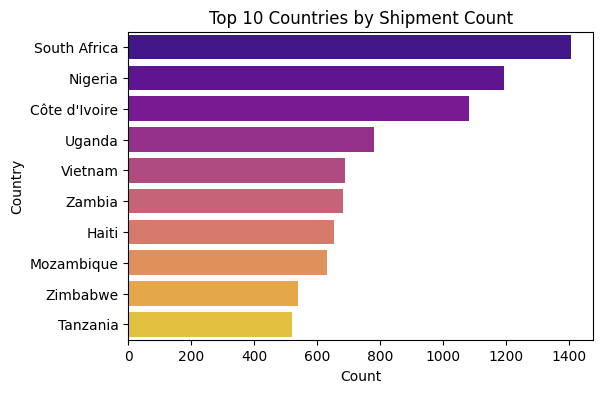

In [33]:
# Top 10 Countries
plt.figure(figsize=(6, 4))
sns.countplot(data=data, y='Country', order=data['Country'].value_counts().head(10).index, palette='plasma')
plt.title("Top 10 Countries by Shipment Count")
plt.xlabel("Count")
plt.show()

Bar charts are ideal for comparing discrete categories like country-wise shipment frequency

* South Africa, Nigeria, and Côte d'Ivoire are the leading countries in terms of shipment frequency, indicating high operational volume.

* These countries are key focus areas for FedEx logistics, likely due to recurring supply needs or strong distribution networks.

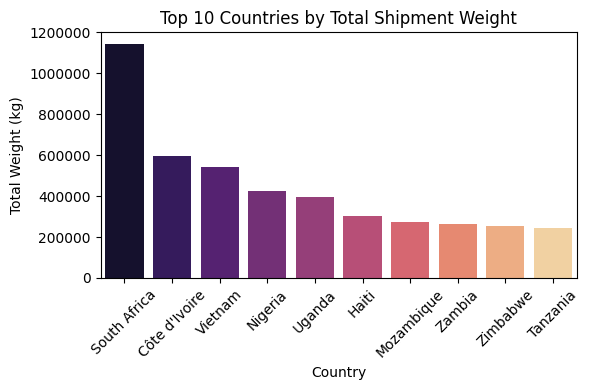

In [34]:
# Group by country and sum weight
top10_weight = (
    data.groupby('Country')['Weight (Kilograms)']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(data=top10_weight, y='Weight (Kilograms)', x='Country', palette='magma')
plt.title("Top 10 Countries by Total Shipment Weight")
plt.xlabel("Country")
plt.ylabel("Total Weight (kg)")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bar charts help visually rank numerical values like total shipment weight across countries

* South Africa, Côte d'Ivoire and Vietnam dominates shipment weight, which implies they may receive bulkier or heavier items despite fewer shipments.

* This indicates a need for optimized heavy freight solutions in these countries to manage logistics costs efficiently.

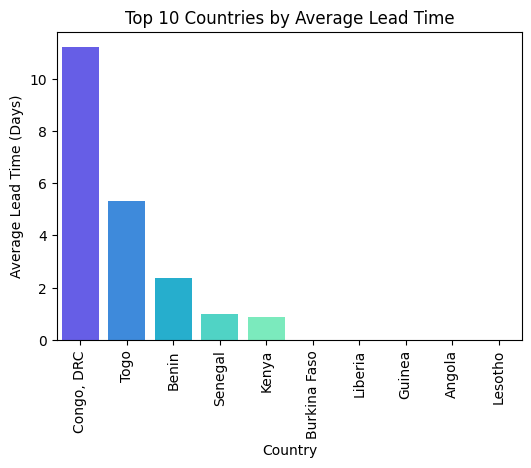

In [35]:
#Top 10 Countries with Highest Average Lead Time
plt.figure(figsize=(6, 4))
country_lead=data.groupby('Country')['Lead Time (Days)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=country_lead.index, y=country_lead.values, palette='rainbow')
plt.title("Top 10 Countries by Average Lead Time")
plt.ylabel("Average Lead Time (Days)")
plt.xticks(rotation=90)
plt.show()

* Plot is showing that in Congo, DRC, the lead time is very much higher than any other country which needs to be focused on timely deiveries.
* However, Tongo and Benim has less lead time but it also needs foucs on timely deliveries for client satisfaction

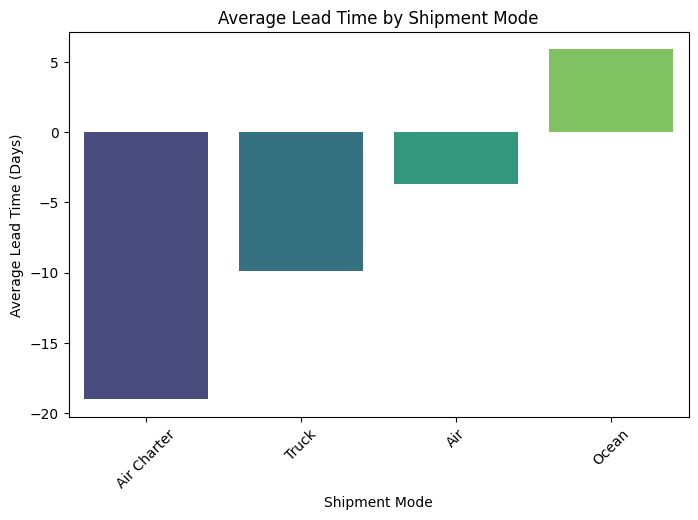

In [36]:
# Average Lead Time by Shipment Mode
plt.figure(figsize=(8, 5))
shipment_lead=data.groupby('Shipment Mode')['Lead Time (Days)'].mean().sort_values()
sns.barplot(x=shipment_lead.index, y=shipment_lead.values, palette='viridis')
plt.title("Average Lead Time by Shipment Mode")
plt.ylabel("Average Lead Time (Days)")
plt.xticks(rotation=45)
plt.show()

Negative values mean early deliveries (delivered before scheduled).

Positive values mean late deliveries (delivered after scheduled).

Modes compared: Air Charter, Truck, Air, and Ocean.

* Air charter as aspected provide earlier deliveries, also truck and Air, while shipment through Ocean may leads client loss.
* Air charter is effective for  urgent or high-priority shipments but it may incur high logistics cost
* Truck may be used more regionally, ensuring faster routing without long customs delays.
* Air is effective for scheduled early delivery but not as aggressively ahead as Air Charter.
* FedEx may need to re-evaluate its ocean freight routes or partners to improve reliability.

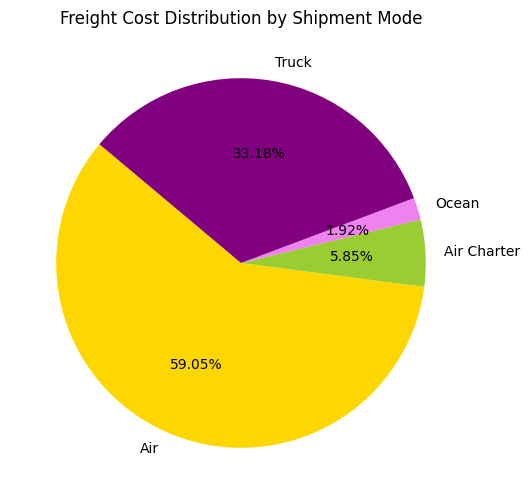

In [37]:
# Shipment Mode based Freight Cost
cost_by_mode = data.groupby('Shipment Mode')['Freight Cost (USD)'].sum()
plt.figure(figsize=(6, 6))
plt.pie(cost_by_mode, labels=cost_by_mode.index, autopct='%1.2f%%', startangle=140,
        colors=['gold', 'yellowgreen', 'violet', 'purple'])
plt.title('Freight Cost Distribution by Shipment Mode')
plt.show()

Pie charts are effective in showing proportionate contributions

* Air shipments account for the majority of freight costs (59.05%), followed by trucks, which suggests that air freight is the primary mode despite its higher cost.

* This highlights a potential area for cost reduction by evaluating alternate modes for appropriate routes.

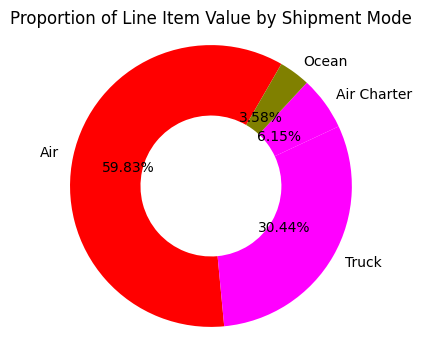

In [38]:
# Shipment Mode by Line Item Value
plt.figure(figsize=(4,4))
shipment_value = data.groupby('Shipment Mode')['Line Item Value'].sum().sort_values(ascending=False)
plt.pie(shipment_value, labels=shipment_value.index, autopct='%1.2f%%', startangle=60,
        colors=['red','magenta','fuchsia','olive'], wedgeprops={'width': 0.5})
plt.title("Proportion of Line Item Value by Shipment Mode")
plt.axis('equal')
plt.show()

Donut charts are visually appealing and highlight part-to-whole relationships

* The highest item value is shipped via air (59.83%) and truck (30.44%), suggesting high-value products rely heavily on faster and more controlled transport methods.

* This distribution supports the prioritization of reliability and speed in high-value goods handling.

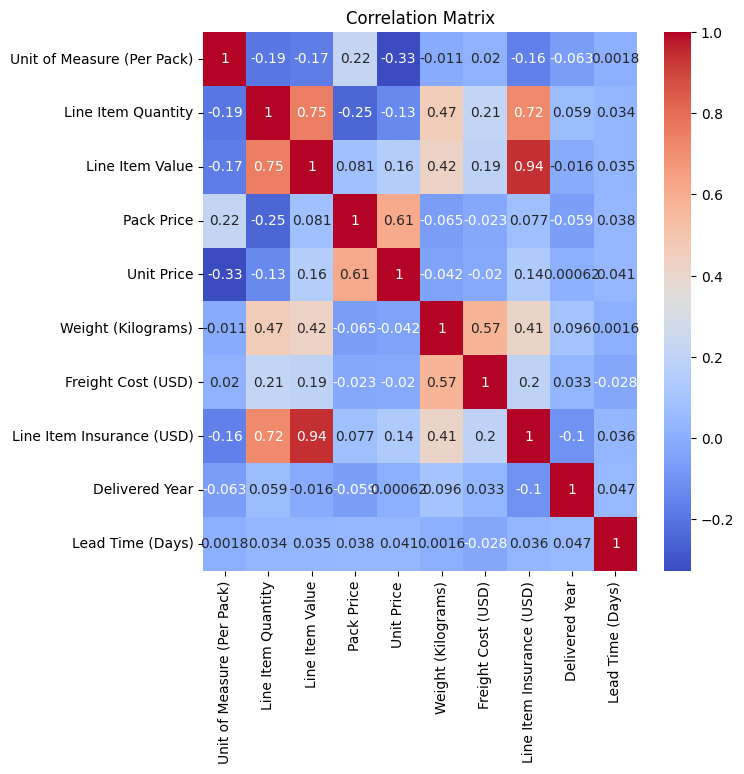

In [39]:
# Correlation Plot
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Heatmaps are best for identifying relationships among multiple numerical variables in a single glance

* Line Item Value is highly correlated with Line Item Quantity (0.75) and Line Item Insurance (0.94), showing larger orders not only increase cost but also insurance.

* Freight cost has a moderate positive correlation with quantity and weight, confirming its dependency on shipment volume and mass.

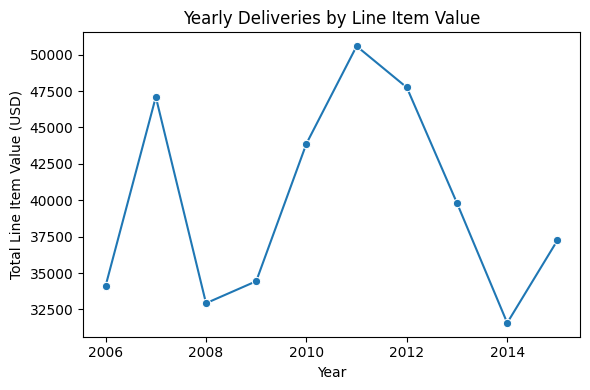

In [40]:
# Time Series Deliveries
plt.figure(figsize=(6, 4))
sns.lineplot(data=data, x='Delivered Year', y='Line Item Value', marker='o', errorbar=None)
plt.title("Yearly Deliveries by Line Item Value")
plt.xlabel("Year")
plt.ylabel("Total Line Item Value (USD)")
plt.tight_layout()
plt.show()

Line plots are ideal for showing trends over time

* This line plot shows fluctuations in total Line Item Value over the years, with peaks in 2007 and 2011.
* The dip after 2012 suggests a decline in high-value deliveries, possibly due to shifting logistics trends or demand.

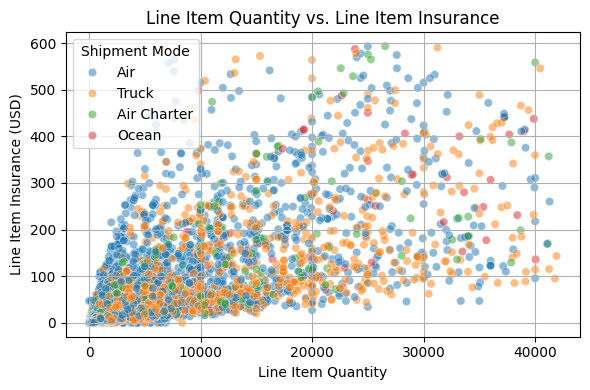

In [41]:
# Relationship between between Line Item Quantity and Line Item Insurance (USD)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Line Item Quantity', y='Line Item Insurance (USD)',
                hue='Shipment Mode', alpha=0.5)
plt.title("Line Item Quantity vs. Line Item Insurance")
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter plots help reveal relationships and distribution patterns

* There is a visible positive correlation between quantity and insurance, with larger quantities generally having higher insurance costs.
* The "Air" and "Truck" modes dominate, indicating these are the most frequent and insured shipment types.

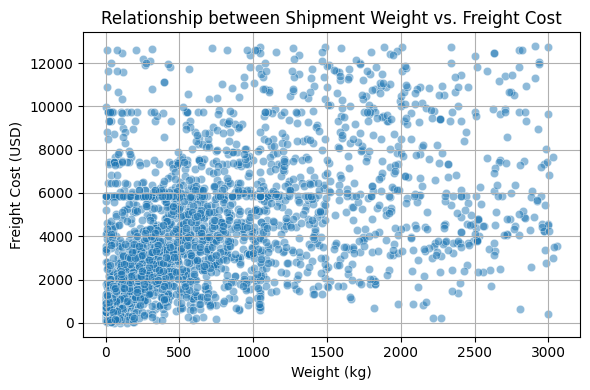

In [42]:
# Relationship between between shipment weight and freight cost
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Weight (Kilograms)', y='Freight Cost (USD)', alpha=0.5)
plt.title("Relationship between Shipment Weight vs. Freight Cost")
plt.xlabel("Weight (kg)")
plt.ylabel("Freight Cost (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

* As shipment weight increases, the freight cost tends to rise, though not in a perfectly linear fashion.
* Many shipments have moderate weights and costs, but a few large ones skew the distribution upwards.

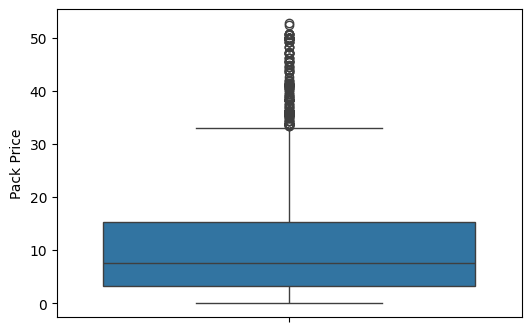

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,y='Pack Price')
plt.show()

Box plots efficiently summarize distribution and highlight outliers

* Most Pack Prices lie below 20, with a significant number of high-value outliers exceeding $30.

* These outliers suggest that a few premium or bulk items drive up the overall range of pricing.

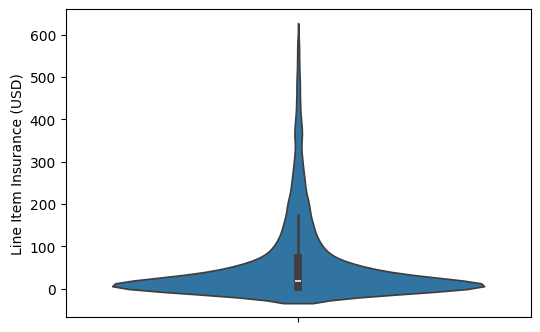

In [44]:
plt.figure(figsize=(6,4))
sns.violinplot(data=data,y='Line Item Insurance (USD)')
plt.show()

Violin plots combine box plot stats with distribution shape

* Right-skewed distribution, where most insurance values are concentrated below $100, but a long tail of higher values exists.
* The shape confirms that a small number of items incur unusually high insurance costs.

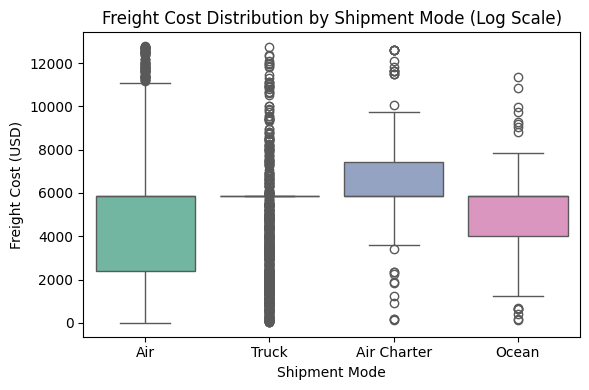

In [45]:
# Freight Cost by Shipment Mode
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Shipment Mode', y='Freight Cost (USD)', palette='Set2')
plt.title("Freight Cost Distribution by Shipment Mode (Log Scale)")
plt.xlabel("Shipment Mode")
plt.ylabel("Freight Cost (USD)")
plt.tight_layout()
plt.show()

* Air and Air Charter shipments show higher median freight costs, while Truck has more extreme outliers.

* The log scale reveals cost variability across shipment modes, emphasizing that cost patterns differ significantly by mode.



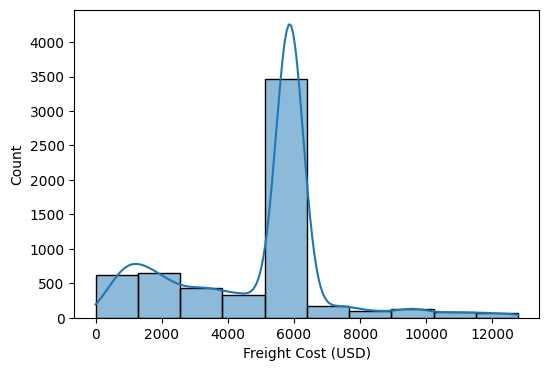

In [46]:
plt.figure(figsize=(6,4))
sns.histplot(data=data,x='Freight Cost (USD)',bins=10,kde=True)
plt.show()

A histogram with KDE overlays shows the frequency distribution

* The distribution is right-skewed with a sharp peak around $6000, indicating a common cost point.

* There are multiple smaller peaks and a long tail, suggesting the presence of several shipment types with varying cost levels.

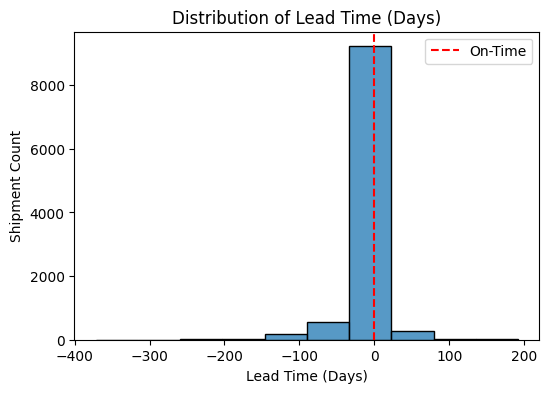

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(data['Lead Time (Days)'], bins=10, kde=False)
plt.title("Distribution of Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Shipment Count")
plt.axvline(0, color='red', linestyle='--', label='On-Time')
plt.legend()
plt.show()

* To show the frequency of deliveries time histogram plotted.

* A lots of deliveries has been done on time as shown in figure, approximately 60% of deliveries has done on time.
* Some values are in negative which shows proactive or early delivery, which could be beneficial for client satisfaction, however a very few values are Positive Lead Time which reflects late deliveries.

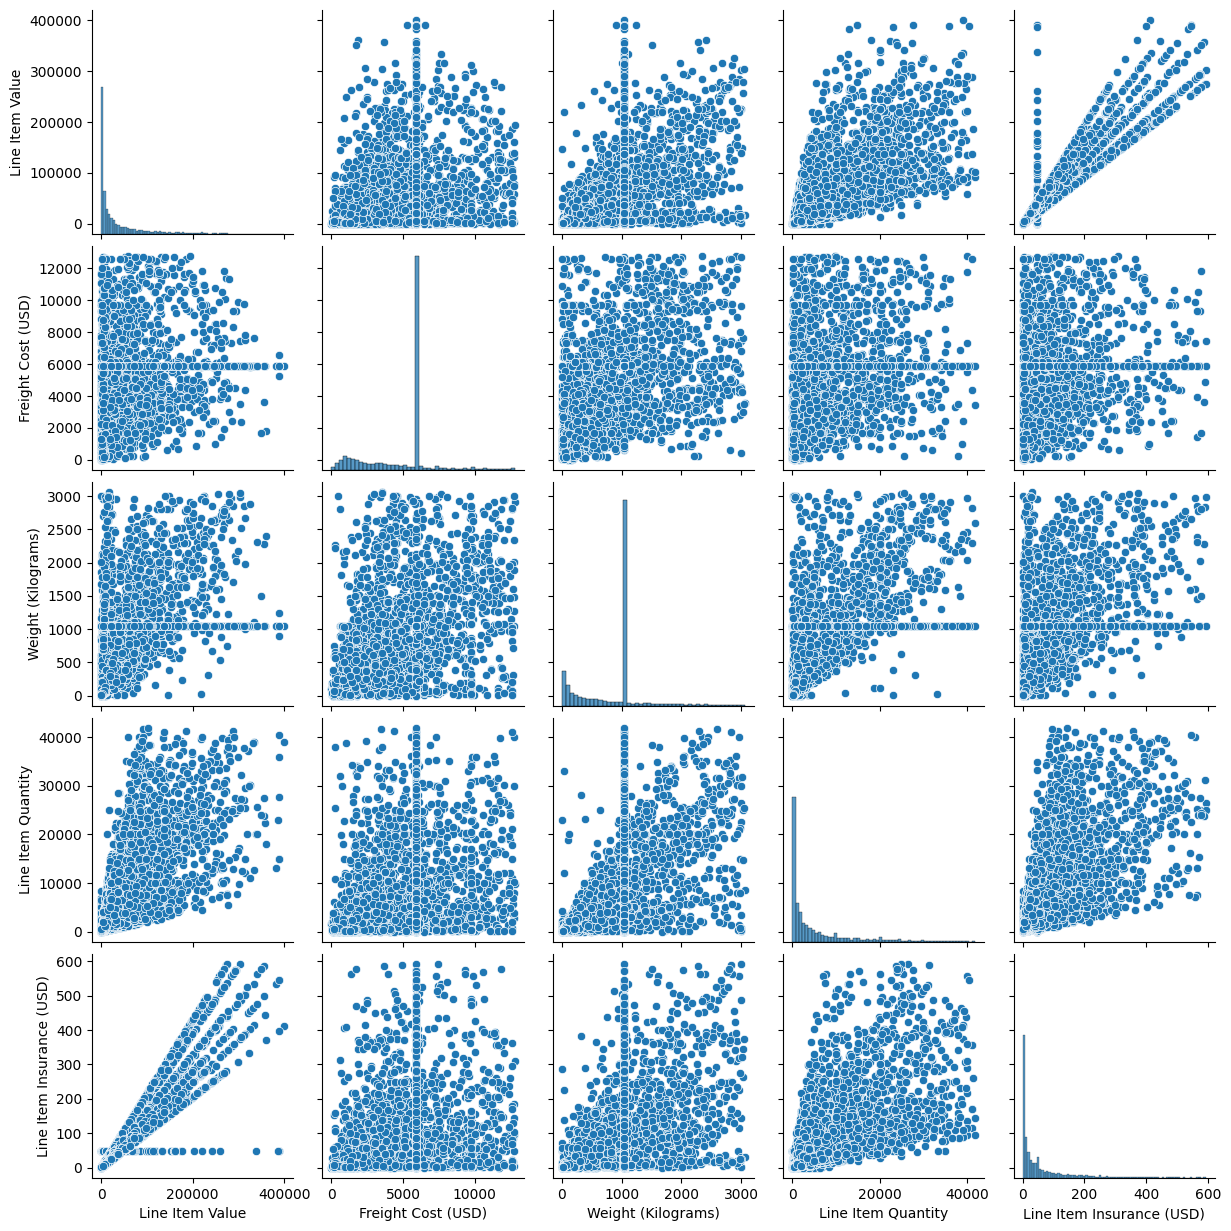

In [48]:
pair_cols = [
    'Line Item Value',
    'Freight Cost (USD)',
    'Weight (Kilograms)',
    'Line Item Quantity',
    'Line Item Insurance (USD)',
]
pairplot_data = data[pair_cols]
sns.pairplot(pairplot_data)
plt.show()

Pairplots are useful to observe all pairwise relationships and distributions at once for all the variables

* There is a strong linear relationship between Line Item Value and Line Item Insurance, as seen in their aligned scatter pattern.

* Freight Cost and Weight also show some correlation, but data is highly dispersed with visible outliers in many dimensions.

In [49]:
# Country-wise Share of Total Line Item Value
country_value = data.groupby('Country')['Line Item Value'].sum().reset_index()
country_value = country_value.sort_values('Line Item Value', ascending=False).head(20)  # Top 20 countries
fig = px.treemap(country_value, path=['Country'], values='Line Item Value',
                 title='Top 20 Countries by Total Line Item Value',
                 color='Line Item Value', color_continuous_scale='Viridis')
fig.show()

In [50]:
# Logistics Cost Breakdown (Freight + Insurance + Value)
funnel_data = {
    "Stage": ["Line Item Value", "Line Item Insurance (USD)", "Freight Cost (USD)"],
    "Amount": [
        data["Line Item Value"].sum(),
        data["Line Item Insurance (USD)"].sum(),
        data["Freight Cost (USD)"].sum()
    ]
}

funnel_df = pd.DataFrame(funnel_data)

fig = px.funnel(funnel_df, x='Amount', y='Stage', title='Logistics Cost Funnel')
fig.show()

* This plot has been used to visualize the breakdown of logistics costs across three categories

* Line Item Value is the highest (≈ $237M), representing the total value of shipped goods.

* Line Item Insurance is comparatively minimal (≈ $368k), indicating very low insurance coverage.

* Freight Cost is significant (≈ $29.7M), making it the second-largest cost component after the item value.

In [51]:
# Top Countries by Line Item Value Over Years
race_data = data.groupby(['Delivered Year', 'Country'])['Line Item Value'].sum().reset_index()

top_countries = race_data.groupby('Country')['Line Item Value'].sum().nlargest(10).index
race_data = race_data[race_data['Country'].isin(top_countries)]

fig = px.bar(race_data, x='Country', y='Line Item Value', color='Country',
             animation_frame='Delivered Year', title='Top Countries by Line Item Value Over Time')
fig.show()

* Showing how different countries contributed to shipment value across years.

* Shows changes in Line Item Value from 2006 onward.

* Country-specific demand varies by year; logistics strategy should adapt accordingly.

* Highlights where shipment activity was most intense over time.


In [52]:
# Line Item Value by Product Group & Sub Classification
Product_line = data.groupby(['Product Group', 'Sub Classification'])['Line Item Value'].sum().reset_index()

# Plot stacked bar chart
fig = px.bar(
    Product_line,
    x='Product Group',
    y='Line Item Value',
    color='Sub Classification',
    title='Line Item Value by Product Group and Sub Classification',
    labels={'Line Item Value': 'Total Value (USD)'},
    text_auto='.2s'
)

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

* Displaying how different product groups and their sub-types contribute to value.

* ARV (Antiretrovirals) dominate, especially Adult subcategories, totaling over $210M.

* Other groups like HRDT, ACT, ANTM, and MRDT contribute marginally in comparison.

# **Solution to Business Objective**

Average freight cost by shipment mode was computed to select the most cost-efficient option.

Delivery delays were analyzed to highlight countries or shipment mode with chronic underperformance.

Shipment mode impact was visualized to guide strategic choices in transportation planning.

Outlier detection flagged high-risk or inefficient deliveries for managerial review.

KPI dashboards were proposed to support real-time logistics monitoring.

# **Conclusion**

Air shipments, while fast, significantly increase freight costs. Balancing shipment urgency and cost is essential.

Certain vendors and countries consistently exhibit higher lead times and costs, indicating a need for renegotiation or strategic shifts.

Data-driven monitoring of shipment patterns can improve delivery planning and cost control.

Visualization of KPIs enables operations managers to quickly assess bottlenecks and take corrective action.